# Page Similarity Analysis with TF-IDF

This project analyzes the textual similarity between different web pages using TF-IDF vectorization and cosine similarity. By generating a heatmap of pairwise comparisons, we can identify which pages contain overlapping or redundant content, which is useful for SEO, content audits, and UX improvements.

**Goal:**  
To compute and visualize content similarity between multiple URLs in order to support decisions about content consolidation, internal linking, or SEO cleanup.


## Dataset

- **File:** `refund-search-urls.csv`
- **Contents:** Each row represents a web page, with the key column being `text` (raw text from the page) and `url`.
- **Preprocessing:** Null values are dropped, and text is tokenized with stopword and punctuation removal using NLTK.
- **Source:** The contents of the dataset were available on a public website. No additional or proprietary data was used.


## Methodology

1. Load and clean the dataset  
2. Preprocess text using lowercase conversion, punctuation removal, and stopword filtering  
3. Vectorize text using **TF-IDF**  
4. Compute pairwise cosine similarity between pages  
5. Visualize results with a heatmap

This technique helps uncover duplicate, near-duplicate, or thematically related content. Duplicate content is problematic for search engine optimization and user experience. 


In [2]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
import string

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('refund-search-urls.csv')
df2 = df.dropna()
df2

,url,text
0,https://www.irs.gov/refunds,Check Your Refund Information is updated on...
1,https://www.irs.gov/filing/wheres-my-amended-r...,Coronavirus Processing Delays It’s taking us m...
2,https://www.irs.gov/refunds/about-wheres-my-re...,What information is available? You can start c...
3,https://www.irs.gov/newsroom/check-the-status-...,You can check the status of your 2022 income t...
4,https://www.irs.gov/faqs/irs-procedures/refund...,Question What if I entered the correct account...
5,https://www.irs.gov/coronavirus/employee-reten...,The Employee Retention Credit (ERC) – sometim...
6,https://www.irs.gov/faqs/irs-procedures/refund...,Question What if I entered the correct account...


## Next Steps

- Cluster pages based on similarity to suggest page groups  
- Run analysis on content segmented by topic or audience  
- Automate into a content health dashboard


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/colleenshifflett/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/colleenshifflett/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)


def preprocess(text):
  return nltk.word_tokenize(text.lower().translate(remove_punctuation_map))

In [9]:
eng_stopwords = stopwords.words('english')

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=preprocess, stop_words=eng_stopwords)

In [13]:
def compute_similarity(a, b):
  tfidf = vectorizer.fit_transform([a, b])

  return ((tfidf * tfidf.T).toarray())[0,1]

In [22]:
M = np.zeros((df2.shape[0], df2.shape[0])) # we create a 30x30 matrix to contain the results of article_i with article_j


for i, row in tqdm(df2.iterrows(), total=df2.shape[0], desc='1st level'): # we define i
	for j, next_row in df2.iterrows(): # we define j
		M[i, j] = compute_similarity(row.text, next_row.text) # we populate the matrix with the results


1st level: 100%|██████████| 7/7 [00:00<00:00, 22.09it/s]


## Heatmap Insights

The resulting heatmap shows a similarity score from 0 to 1 between each pair of pages:

- **1.00** = identical (usually the same page compared to itself)  
- **~0.6–0.9** = very similar content, possibly redundant  
- **< 0.3** = minimal overlap

Use this to:
- Identify opportunities for merging or redirecting similar pages  
- Spot outliers or isolated content  
- Improve internal linking strategies


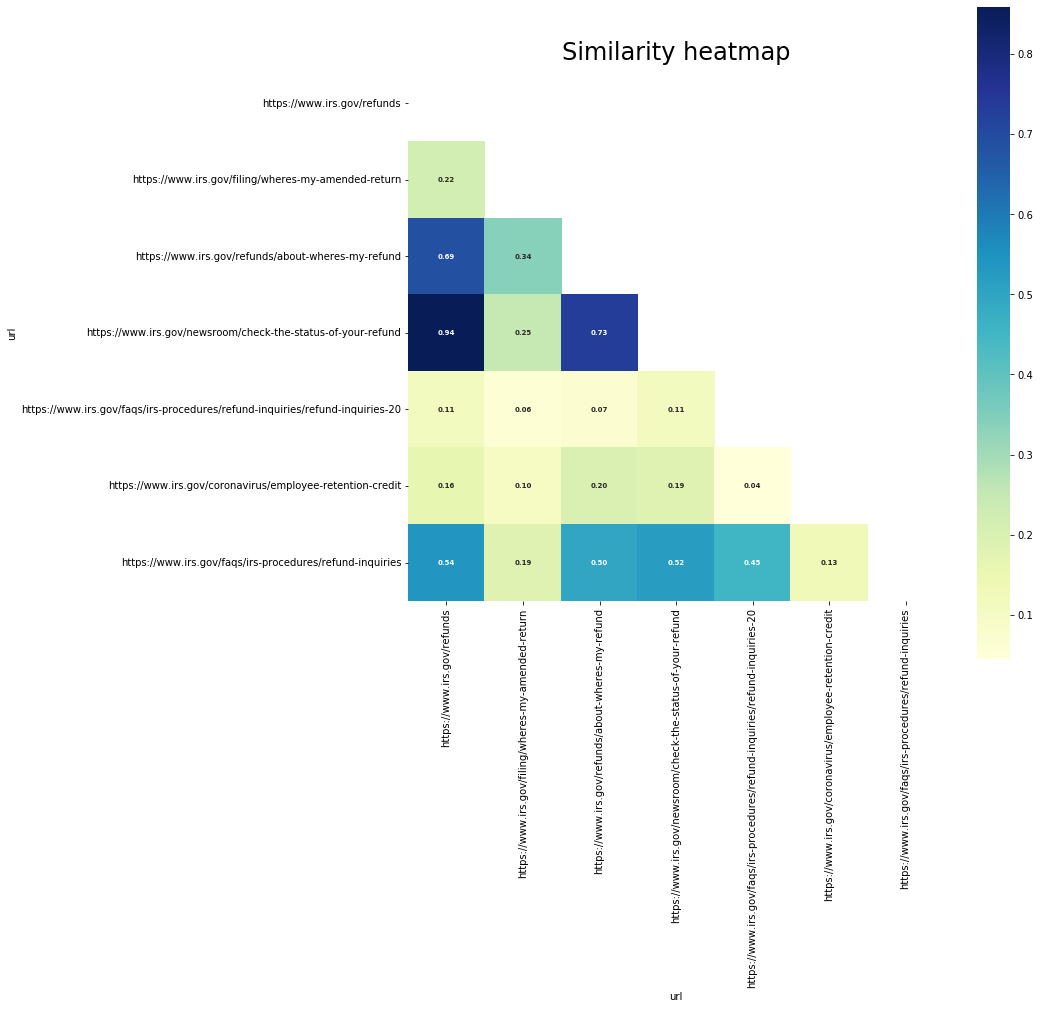

In [28]:
labels = df2.url# we extract the titles of the articles from the url
similarity_df = pd.DataFrame(M, columns=labels, index=labels) # let's create the dataframe
mask = np.triu(np.ones_like(similarity_df)) # we apply a mask to remove the top of the heatmap

# let's create the viz
plt.figure(figsize=(12, 12))
sns.heatmap(
			similarity_df,
			square=True, 
			annot=True, 
			robust=True,
			fmt='.2f',
			annot_kws={'size': 7, 'fontweight': 'bold'},
			yticklabels=similarity_df.columns,
			xticklabels=similarity_df.columns,
			cmap="YlGnBu",
			mask=mask
)

plt.title('Similarity heatmap', fontdict={'fontsize': 24})
plt.show()

## Actions

- Analyze results and take possible actions.  
- Refocus and rewrite pages 
- Consolidate and redirect pages if needed. 